### Visual tests for data.py

In [ ]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms.v2 as T
from mitotem.data import MitoSS

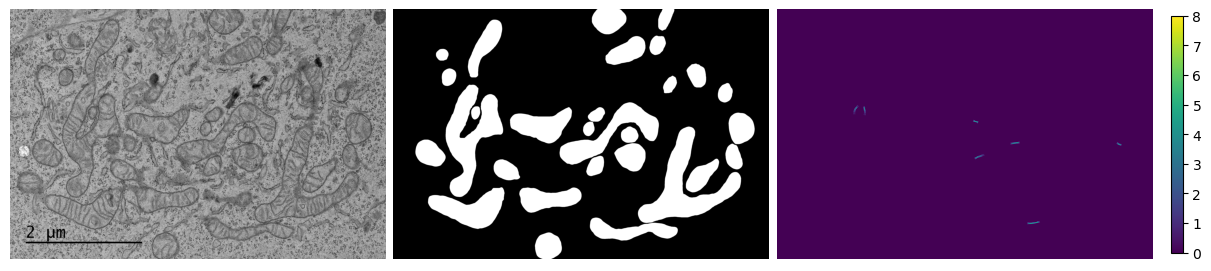

In [2]:
dataset = MitoSS()
example = dataset[81]

fig, axes = plt.subplots(1,3,figsize=(12,6), layout='constrained')

for img, ax, cmap in zip(example, axes, ('gray','gray','viridis')):
    im = ax.imshow(img, cmap=cmap)
    ax.set_axis_off()
fig.colorbar(im, shrink=0.4);

### Augmentation policy test

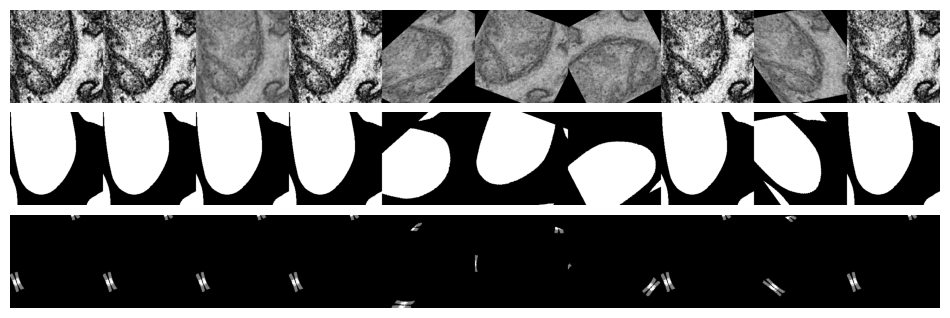

In [ ]:
from mitotem.data import augment

transform = T.Compose([T.CenterCrop(224), augment, T.Lambda(lambda x: x.squeeze())])
dataset = MitoSS(transform=transform)

examples = []
for i in range(10):
    examples.append(dataset[101])

fig, axes = plt.subplots(3,1, figsize=(12,4))
fig.subplots_adjust(hspace=0)
for i, row in enumerate(zip(*examples)):
    axes[i].imshow(np.concat(row, axis=1), cmap="gray")
    axes[i].set_axis_off()

### Complete transform pipeline test

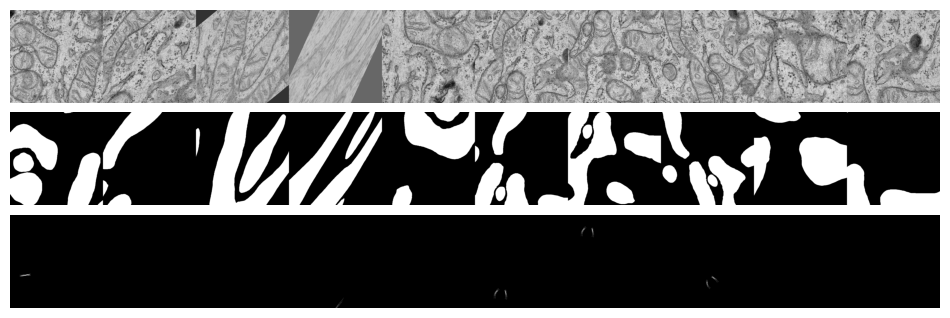

In [4]:
from mitotem.data import transform

dataset = MitoSS(transform=T.Compose([transform(512, train=True), T.Lambda(lambda x: x.squeeze())]))

examples = []
for i in range(10):
    examples.append(dataset[81])

fig, axes = plt.subplots(3,1, figsize=(12,4))
fig.subplots_adjust(hspace=0)
for i, row in enumerate(zip(*examples)):
    axes[i].imshow(np.concat(row, axis=1), cmap="gray")
    axes[i].set_axis_off()